In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/InfosysMain/mediscan-env')
print(os.getcwd())

/content/drive/MyDrive/InfosysMain/mediscan-env


# **Packages to be installed for Image preprocessing.**

In [3]:
!pip install \
numpy \
pandas \
opencv-python \
keras \
tensorflow \
pillow \
matplotlib \
scikit-learn \
scikit-image \
scipy

# Installed packages are to be imported

In [4]:
import os
import numpy as np
import pandas as pd
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


# Function to Load, Resize and view Images.

In [5]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
#     print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

# Loading Some Images.


/content/drive/MyDrive/InfosysMain/mediscan-env/data/raw


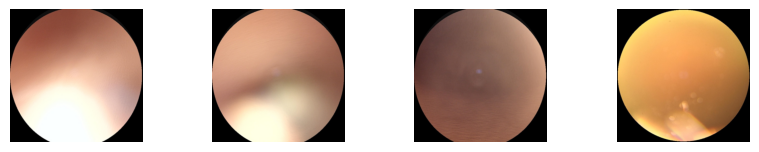

In [7]:
import os
os.chdir('data/raw/')
print(os.getcwd())
path = 'dataset/'
data,result = load_images(path)

# Image Preprocessing:
### In order to enhance the quality of acquired eye images, including noise reduction, image  enhancement, and normalization.
## Validate preprocessing methods and optimize parameters for different imaging modalities.




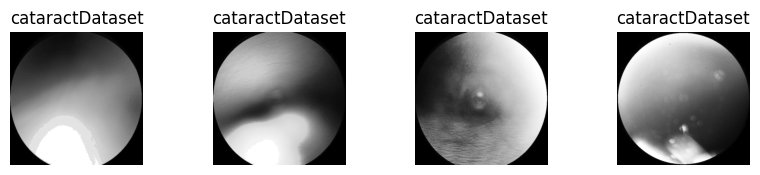

In [8]:
data_dir = 'dataset/'
import cv2 as cv
def preprocess_image(image):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Noise Reduction using Gaussian Blur
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Image Enhancement using Histogram Equalization
    image = cv2.equalizeHist(image)

    # Normalization to the range [0, 1]
    image = image / 255.0

    return image

def load_and_preprocess_images(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_path = os.path.join(category_path, file)
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (512, 512))
                    image = preprocess_image(image)
                    images.append(image)
                    labels.append(category)
    return np.array(images), np.array(labels)

# Load and preprocess the images
images, labels = load_and_preprocess_images(data_dir)

# Display some preprocessed images
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(5, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# Image Segmentation
## Develop algorithms to segment Eye images and isolate regions of interest, such as organs, tissues, or lesions, for further analysis.

## Test segmentation algorithms on diverse datasets and refine them to improve accuracy and robustness.


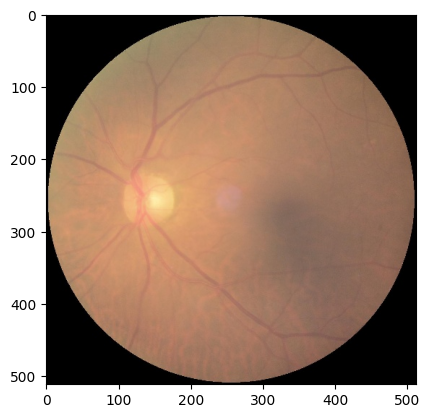

In [9]:
image = plt.imread('dataset/cataractDataset/1102_left.jpg')
image.shape
plt.imshow(image)

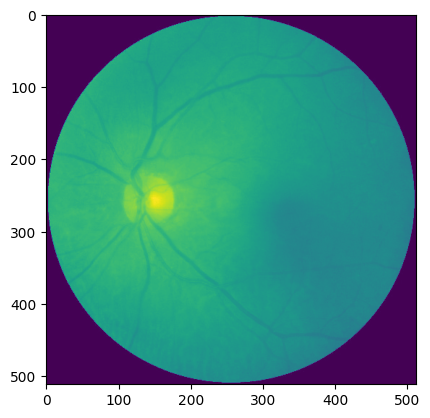

In [11]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

gray = rgb2gray(image)
plt.imshow(gray)

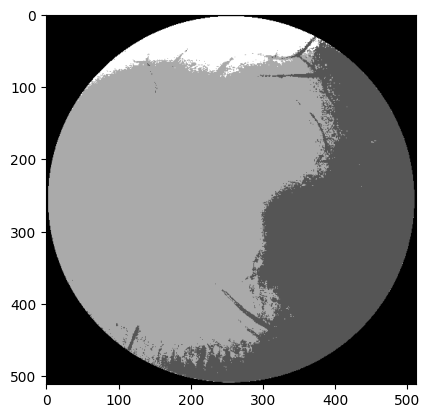

In [12]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [13]:
gray.shape

(512, 512)

## Print information about the categorical data. Convert the categorical values to numerical codes ----> cat.codes returns the numerical codes for each category

In [14]:
# This tells pandas to treat the values as categorical
t = pd.Series(
    data=result,
    dtype='category',
    name='Category'  # Optional: specify a name for the Series
)

# Convert the categorical values to numerical codes
t_codes = t.cat.codes

# Print the resulting Series
print("Categorical Codes:")
print(t_codes)

# Print additional information about the categorical data
print("\nCategorical Categories:")
print(t.cat.categories)

print("\nCategory Counts:")
print(t.value_counts())


Categorical Codes:
0       0
1       0
2       0
3       0
4       0
       ..
4212    3
4213    3
4214    3
4215    3
4216    3
Length: 4217, dtype: int8

Categorical Categories:
Index(['cataractDataset', 'diabetic_retinopathy', 'glaucoma', 'normal'], dtype='object')

Category Counts:
Category
diabetic_retinopathy    1098
normal                  1074
cataractDataset         1038
glaucoma                1007
Name: count, dtype: int64
